Use KNN classifier to determine whether the return of close price of Tesla will be postive or negative, indicating the stock price went up/down 

The sectors considered are 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'

In [1]:
# import knn classifier from scikit learn lib
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import math

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in TSLA data 
data = pd.read_csv('TSLA_data.csv').drop('Date', axis = 1)
print(len(data))

756


In [3]:
# check for values that are zeroes
zero_count = (data == 0).sum().sum()
print(zero_count)

0


In [4]:
# check for missing values
nan_count = data.isna().sum().sum()
print(nan_count)

0


In [5]:
# although it has been checked that there are no missing data or unusual zeroes, will still write out an algorithm 
# dealing with missing data
# clean data, replace zeroes with nan values, then nan values with data mean 

def replace_zeros_with_mean(df):
    df = df.replace(0, np.nan)
    df = df.fillna(df.mean(skipna = True))

    return df

data = replace_zeros_with_mean(data)

The Y value is the result of whether the stock price went up/down, this will be on daily return calculated
based on close price 

In [6]:
# add a column of close price return 
data['Return'] = data['Close'].pct_change()

# generate binary output 

def output(value):
    if value > 0:
        return 1
    elif pd.isna(value):
        return np.nan
    else:
        return 0

# replace nan values for 1st day with mean    
data = data.fillna(data.mean(skipna = True))

data['Output'] = data['Return'].apply(output)
data

,Open,High,Low,Close,Adj Close,Volume,Return,Output
0,28.299999,28.713333,28.114000,28.684000,28.684000,142981500,0.002965,1
1,29.366667,30.266666,29.128000,29.534000,29.534000,266677500,0.029633,1
2,29.364668,30.104000,29.333332,30.102667,30.102667,151995000,0.019255,1
3,30.760000,31.441999,30.224001,31.270666,31.270666,268231500,0.038801,1
4,31.580000,33.232666,31.215334,32.809334,32.809334,467164500,0.049205,1
...,...,...,...,...,...,...,...,...
751,126.370003,128.619995,121.019997,123.150002,123.150002,166989700,-0.017551,0
752,117.500000,119.669998,108.760002,109.099998,109.099998,208643400,-0.114089,0
753,110.349998,116.269997,108.239998,112.709999,112.709999,221070500,0.033089,1
754,120.389999,123.570000,117.500000,121.820000,121.820000,221923300,0.080827,1


In [7]:
# split dataset into test and train 
X = data.iloc[:, 0:6]
y = data.iloc[:, 7]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [8]:
# will be using euclidean distance later -> feature scaling 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [9]:
# now will write initialize knn model
n = int(math.sqrt(len(y_test)))
if n % 2 == 0:
    n += 1

classifier = KNeighborsClassifier(n_neighbors = n, p = 2, metric = 'euclidean')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [10]:
# predict result
y_pred = classifier.predict(X_test)

print(len(y_pred))
print(y_pred.sum())

152
88


In [11]:
# interpret result with confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# interpret result with f1 score
print(f"f1 score: {f1_score(y_test, y_pred)}")

# interpret result with accuracy score
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

[[29 34]
 [35 54]]
f1 score: 0.6101694915254238
Accuracy score: 0.5460526315789473


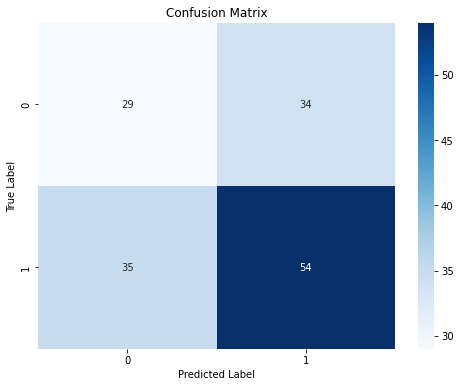

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classifier.classes_, yticklabels=classifier.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png', format='png', dpi=300)

plt.show() 

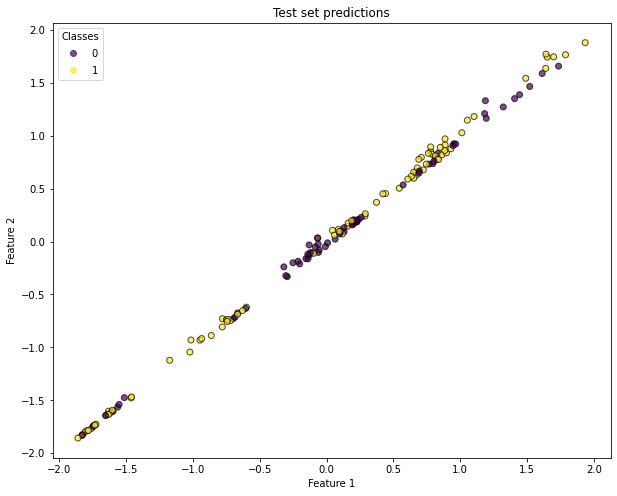

In [13]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('Test set predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.savefig('knn_predictions.png', format='png', dpi=300)

plt.show()
